In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
x1=-0.5
x2=-0.5

def newton_method(x1,x2):
    Fz = np.array([[x1*x2-x1-2],[x1**2-x2**2-1]])
    Jz = np.array([[x2-1,x1],[2*x1, -2*x2]])
    Z0 = np.array([[x1],[x2]])
    detJz = (Jz[0][0]*Jz[1][1]) - (Jz[0][1]*Jz[1][0])
    if detJz==0:
        return 'Macierz osobliwa'
    Jz_inverted = np.array([[Jz[1][1]/detJz, -1*Jz[1][0]/detJz],[-1*Jz[0][1]/detJz, Jz[0][0]/detJz]])
    Z1 = Z0 - np.matmul(Jz_inverted,Fz)
    while (abs(Z1-Z0)>0.001).all():
        Z0=Z1
        x1=Z0[0][0]
        x2=Z0[1][0]
        Fz = np.array([[x1*x2-x1-2],[x1**2-x2**2-1]])
        Jz = np.array([[x2-1,x1],[2*x1, -2*x2]])
        detJz = (Jz[0][0]*Jz[1][1]) - (Jz[0][1]*Jz[1][0])
        if detJz==0:
            return 'Macierz osobliwa'
        Jz_inverted = np.array([[Jz[1][1]/detJz, -1*Jz[1][0]/detJz],[-1*Jz[0][1]/detJz, Jz[0][0]/detJz]])
        Z1 = Z0 - np.matmul(Jz_inverted,Fz)
    return Z0

In [3]:
p= newton_method(-0.5,-0.5)
xp=p[0][0]
yp=p[1][0]
zp=np.array([[(xp*yp-xp-2)],[(xp**2-yp**2-1)]])
p1="{:.3f}".format(p[0][0])
p2="{:.3f}".format(p[1][0])
p_str='('+p1+','+p2+')'

In [4]:
x1=np.array([x for x in np.arange(-2,2,0.001)])
x2=np.array([x for x in np.arange(-2,2,0.001)])
x, y = np.meshgrid(x1,x2)
y1=np.array([(x*y-x-2) for x,y in zip(x,y)])
y2=np.array([(x**2-y**2-1) for x,y in zip(x,y)])

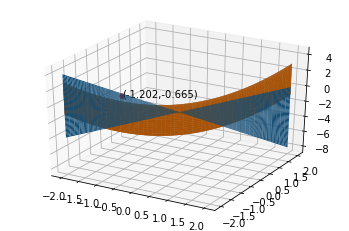

In [5]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(x1,x2,y1,shade=True)
ax.plot_surface(x1,x2,y2,shade=True)
ax.scatter(xp,yp,zp, c='r')
ax.text(xp, yp, 0,p_str)
plt.show()